# Variation of |Zst| with the parameters

In [1]:
from scipy.optimize import root
import numpy as np 
from matplotlib import pyplot as plt
from scipy.integrate import odeint 
import math
Δ=3.8*10**(-3.0)

In [2]:
def diff(X,K,F,Ω):
    x,y=X
    xdot = 0.5*(K*x +F)*(1+y*y-x*x) - K*x*y*y +Ω*y - x
    ydot = -0.5*(K*x*x*y + 2*F*x*y + K*y*y*y -K*y) -Ω*x -y
    return (xdot,ydot)

def zst(diff,K,F,Ω):
    sol = root(diff,x0=(1,0),args=(K,F,Ω),method='lm')
    zs = complex(sol.x[0],sol.x[1])
    return zs

In [3]:
dK=0.01
steps=int(((16-2)/dK)+1)
kk=np.zeros(shape=(2,steps))
F=3.5
Ω=1.4
for i in range(steps):
    K=2.0+(dK*i)
    kk[0,i]=K
    kk[1,i]=np.absolute(zst(diff,K,F,Ω)) 

Text(0.5, 0, 'K/Δ')

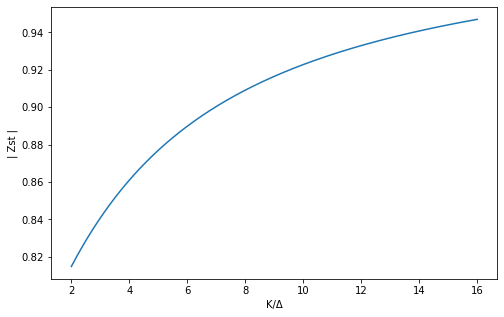

In [9]:
plt.figure(figsize=(8,5))
plt.plot(kk[0,:],kk[1,:])
plt.ylabel('| Zst |')
plt.xlabel('K/Δ')

In [7]:
dF=0.01
steps=int(((6-1.5)/dF)+1)
ff=np.zeros(shape=(2,steps))
K=4.5
Ω=1.4
for i in range(steps) :
    F=1.5+(dF*i)
    ff[0,i]=F
    ff[1,i]=np.absolute(zst(diff,K,F,Ω)) 

Text(0.5, 0, 'F/Δ')

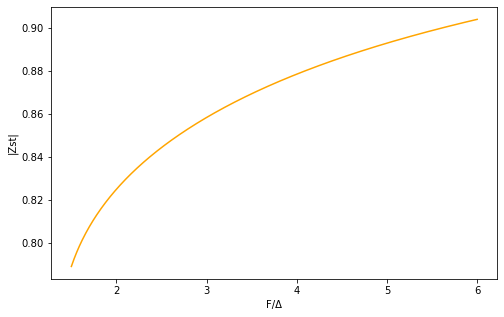

In [10]:
plt.figure(figsize=(8,5))
plt.plot(ff[0,:],ff[1,:],'orange')
plt.ylabel('|Zst|')
plt.xlabel('F/Δ')

In [11]:
dO=0.01
steps=int(((8)/dO)+1)
oo=np.zeros(shape=(2,steps))
K=4.5
F=3.5
for i in range(steps) :
    Ω=-4.0+(dO*i)
    oo[0,i]=Ω
    oo[1,i]=np.absolute(zst(diff,K,F,Ω)) 

Text(0.5, 0, 'Ω/Δ')

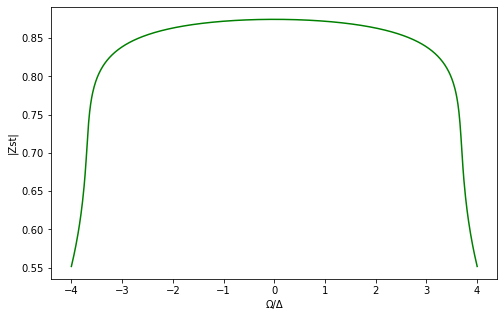

In [13]:
plt.figure(figsize=(8,5))
plt.plot(oo[0,:],oo[1,:],'green')
plt.ylabel('|Zst|')
plt.xlabel('Ω/Δ')